In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip RaceEqu

In [ ]:
!ls

 20099996874_AKBxxxxx5C_A2.pdf
 accuracy_curve.png
 aprilsix.apk
 arlibrarytwo.apk
'ARONE (1).apk'
 ARONE.apk
 ARONEe.apk
'ARTHREE (1).apk'
'ARTHREE (2).apk'
 ARTHREE.apk
 artwo.apk
 artwocspacevideo.apk
 artwocspacevideonew.apk
'artwovideoremoved (1).apk'
 artwovideoremoved.apk
 checkpoint.pth.tar
'clahe and histogramequilization.ipynb'
'Colab Notebooks'
'Colab Notebooks (1)'
 complete.apk
'Extractind fairfacedata-SD.ipynb'
 fairfaceclahe.zip
'_FairfaceSQI ResNet - Female vs Male.ipynb'
 fairfacesqi.zip
 img016.jpg
'LAB STATS USER LOGIN .gsheet'
'Lesson plan.gslides'
'Letter of Admission.pdf'
 loss_curve.png
 m.apk
 mm.apk
 mmk.apk
 model_best.pth.tar
 model.png
 models
 n.apk
 new.apk
'newar (1).apk'
 newar.apk
'resnet-50 model project au-sh.ipynb'
'ResNet - Female vs Male.ipynb'
 retinex.py
 run.py
 save_at_1.h5
 save_at_2.h5
 save_at_3.h5
 save_at_4.h5
 test123.txt
 test.apk
 test_model_state_dict.txt
 test_optimizer_state_dict.txt
'Track 15 KhyatiVarsha Finalv3.mp4'
 twentyoneapri

In [ ]:
ls RaceClahe/Validation/Black/Female/ 

In [ ]:
ls  fairfaceclahe/Validation/Male

In [ ]:
cd drive/My\ Drive

/content/drive/My Drive


In [ ]:
!unzip RaceClahe.zip

In [ ]:
!unzip fairfaceclahe.zip

Streaming output truncated to the last 5000 lines.
  inflating: fairfaceclahe/Validation/Female/3632.jpg  
  inflating: fairfaceclahe/Validation/Female/2538.jpg  
  inflating: fairfaceclahe/Validation/Female/6986.jpg  
  inflating: fairfaceclahe/Validation/Female/8773.jpg  
  inflating: fairfaceclahe/Validation/Female/7440.jpg  
  inflating: fairfaceclahe/Validation/Female/8015.jpg  
  inflating: fairfaceclahe/Validation/Female/7326.jpg  
  inflating: fairfaceclahe/Validation/Female/1757.jpg  
  inflating: fairfaceclahe/Validation/Female/10719.jpg  
  inflating: fairfaceclahe/Validation/Female/3140.jpg  
  inflating: fairfaceclahe/Validation/Female/228.jpg  
  inflating: fairfaceclahe/Validation/Female/1964.jpg  
  inflating: fairfaceclahe/Validation/Female/8798.jpg  
  inflating: fairfaceclahe/Validation/Female/8940.jpg  
  inflating: fairfaceclahe/Validation/Female/10094.jpg  
  inflating: fairfaceclahe/Validation/Female/6979.jpg  
  inflating: fairfaceclahe/Validation/Female/9492.jp

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import time

import os
import random
import numpy as np

In [ ]:
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [ ]:
train_transforms = transforms.Compose([
                           transforms.RandomHorizontalFlip(),
                           transforms.RandomRotation(10),
                           transforms.RandomCrop((224, 224), pad_if_needed=True),
                           transforms.ToTensor(),
                           transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                       ])

test_transforms = transforms.Compose([
                           transforms.CenterCrop((224, 224)),
                           transforms.ToTensor(),
                           transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                       ])

In [ ]:
train_data = datasets.ImageFolder('fairfaceclahe/Training', train_transforms)
valid_data = datasets.ImageFolder('fairfaceclahe/Validation', test_transforms)
#test_data = datasets.ImageFolder('RaceClahe/Validation/', test_transforms)

#import os

#print(len(os.listdir('data/dogs-vs-cats/train')))

#n_train_examples = int(len(train_data)*0.9)
#n_valid_examples = n_test_examples = len(train_data) - n_train_examples

#train_data, valid_data = torch.utils.data.random_split(train_data, [n_train_examples, n_valid_examples])
#train_data, test_data = torch.utils.data.random_split(train_data, [n_train_examples-n_valid_examples, n_test_examples])

In [ ]:
print(valid_data.class_to_idx)

{'Female': 0, 'Male': 1}


https://github.com/facebook/fb.resnet.torch/issues/180
https://github.com/bamos/densenet.pytorch/blob/master/compute-cifar10-mean.py

In [ ]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
#print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 85902
Number of validation examples: 10836


In [ ]:
BATCH_SIZE = 64

train_iterator = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=BATCH_SIZE)
valid_iterator = torch.utils.data.DataLoader(valid_data, batch_size=BATCH_SIZE)
#test_iterator = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE)

https://discuss.pytorch.org/t/why-does-the-resnet-model-given-by-pytorch-omit-biases-from-the-convolutional-layer/10990/4
https://github.com/kuangliu/pytorch-cifar/blob/master/models/resnet.py

In [ ]:
device = torch.device('cuda')

In [ ]:
import torchvision.models as models

model = models.resnet18(pretrained=True).to(device)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
from torch.optim import lr_scheduler

'model = models.resnet18(pretrained=True)
'model.fc = nn.Sequential(
    'nn.Dropout(0.5),
    'nn.Linear(num_ftrs, 10)
)


num_ftrs = model.fc.in_features
model.fc = nn.Linear(512, 2)

model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

SyntaxError: ignored

Adamoptimizer

In [ ]:
from torch.optim import lr_scheduler


num_ftrs = model.fc.in_features
model.fc = nn.Linear(512, 2)

model = model.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.999),eps=1e-08, weight_decay=0, amsgrad=False)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
print(exp_lr_scheduler.state_dict())

{'step_size': 7, 'gamma': 0.1, 'base_lrs': [0.0001], 'last_epoch': 0, '_step_count': 1, 'verbose': False, '_get_lr_called_within_step': False, '_last_lr': [0.0001]}


In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
def calculate_accuracy(fx, y):
    preds = fx.max(1, keepdim=True)[1]
    correct = preds.eq(y.view_as(preds)).sum()
    acc = correct.float()/preds.shape[0]
    return acc

In [ ]:
def train(model, device, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for (x, y) in iterator:
        
        x = x.to(device)
        y = y.to(device)
        
        optimizer.zero_grad()
                
        fx = model(x)
        
        loss = criterion(fx, y)
        
        acc = calculate_accuracy(fx, y)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, device, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        for (x, y) in iterator:

            x = x.to(device)
            y = y.to(device)

            fx = model(x)

            loss = criterion(fx, y)

            acc = calculate_accuracy(fx, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

SGD Epochs

In [ ]:
EPOCHS = 50
SAVE_DIR = 'models'
MODEL_SAVE_PATH = os.path.join(SAVE_DIR,'clahe-ResentFT-males-vs-females.pt')

best_valid_loss = float('inf')

if not os.path.isdir(f'{SAVE_DIR}'):
    os.makedirs(f'{SAVE_DIR}')

for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, device, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, device, valid_iterator, criterion)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), MODEL_SAVE_PATH)
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:05.2f}% | Val. Loss: {valid_loss:.3f} | Val. Acc: {valid_acc*100:05.2f}% |')

| Epoch: 01 | Train Loss: 0.411 | Train Acc: 80.65% | Val. Loss: 0.390 | Val. Acc: 81.80% |
| Epoch: 02 | Train Loss: 0.378 | Train Acc: 82.45% | Val. Loss: 0.368 | Val. Acc: 83.00% |
| Epoch: 03 | Train Loss: 0.357 | Train Acc: 83.61% | Val. Loss: 0.350 | Val. Acc: 84.09% |
| Epoch: 04 | Train Loss: 0.342 | Train Acc: 84.34% | Val. Loss: 0.335 | Val. Acc: 84.52% |
| Epoch: 05 | Train Loss: 0.327 | Train Acc: 85.23% | Val. Loss: 0.326 | Val. Acc: 85.00% |
| Epoch: 06 | Train Loss: 0.317 | Train Acc: 85.70% | Val. Loss: 0.315 | Val. Acc: 85.52% |
| Epoch: 07 | Train Loss: 0.306 | Train Acc: 86.21% | Val. Loss: 0.308 | Val. Acc: 86.03% |
| Epoch: 08 | Train Loss: 0.298 | Train Acc: 86.65% | Val. Loss: 0.300 | Val. Acc: 86.29% |
| Epoch: 09 | Train Loss: 0.290 | Train Acc: 87.02% | Val. Loss: 0.292 | Val. Acc: 86.81% |
| Epoch: 10 | Train Loss: 0.284 | Train Acc: 87.26% | Val. Loss: 0.289 | Val. Acc: 87.17% |
| Epoch: 11 | Train Loss: 0.278 | Train Acc: 87.70% | Val. Loss: 0.282 | Val. Ac

In [ ]:
import gc

gc.collect()

1583

Adam with EpochIncrement

In [ ]:
EPOCHS = 60
SAVE_DIR = 'models'
MODEL_SAVE_PATH = os.path.join(SAVE_DIR, 'EpochIncrRaceClahe-ResentFT-males-vs-females.pt')

best_valid_loss = float('inf')

if not os.path.isdir(f'{SAVE_DIR}'):
    os.makedirs(f'{SAVE_DIR}')
history = []
for epoch in range(EPOCHS):
    epoch_start = time.time()
    train_loss, train_acc = train(model, device, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, device, valid_iterator, criterion)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), MODEL_SAVE_PATH)

    history.append([train_loss, valid_loss, train_acc, valid_acc])
    epoch_end = time.time()
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:05.2f}% | Val. Loss: {valid_loss:.3f} | Val. Acc: {valid_acc*100:05.2f}% | Time: {epoch_end-epoch_start:.4f}s |')

| Epoch: 01 | Train Loss: 0.263 | Train Acc: 88.42% | Val. Loss: 0.265 | Val. Acc: 88.34% | Time: 631.6388s |
| Epoch: 02 | Train Loss: 0.219 | Train Acc: 90.51% | Val. Loss: 0.218 | Val. Acc: 90.61% | Time: 627.2376s |
| Epoch: 03 | Train Loss: 0.196 | Train Acc: 91.58% | Val. Loss: 0.225 | Val. Acc: 90.68% | Time: 623.3834s |
| Epoch: 04 | Train Loss: 0.176 | Train Acc: 92.62% | Val. Loss: 0.229 | Val. Acc: 90.67% | Time: 624.6900s |
| Epoch: 05 | Train Loss: 0.160 | Train Acc: 93.33% | Val. Loss: 0.210 | Val. Acc: 91.12% | Time: 630.2126s |
| Epoch: 06 | Train Loss: 0.144 | Train Acc: 93.94% | Val. Loss: 0.219 | Val. Acc: 91.54% | Time: 652.8441s |
| Epoch: 07 | Train Loss: 0.129 | Train Acc: 94.76% | Val. Loss: 0.227 | Val. Acc: 91.05% | Time: 629.6908s |
| Epoch: 08 | Train Loss: 0.116 | Train Acc: 95.39% | Val. Loss: 0.235 | Val. Acc: 90.81% | Time: 637.6749s |
| Epoch: 09 | Train Loss: 0.104 | Train Acc: 95.88% | Val. Loss: 0.257 | Val. Acc: 91.39% | Time: 644.6436s |
| Epoch: 1

In [ ]:
EPOCHS = 60
SAVE_DIR = 'models'
MODEL_SAVE_PATH = os.path.join(SAVE_DIR, 'ColabClahe-ResentFT-males-vs-females.pt')

best_valid_loss = float('inf')

if not os.path.isdir(f'{SAVE_DIR}'):
    os.makedirs(f'{SAVE_DIR}')
history = []
for epoch in range(EPOCHS):
    epoch_start = time.time()
    train_loss, train_acc = train(model, device, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, device, valid_iterator, criterion)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), MODEL_SAVE_PATH)

    history.append([train_loss, valid_loss, train_acc, valid_acc])
    epoch_end = time.time()
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:05.2f}% | Val. Loss: {valid_loss:.3f} | Val. Acc: {valid_acc*100:05.2f}% | Time: {epoch_end-epoch_start:.4f}s |')

| Epoch: 01 | Train Loss: 0.333 | Train Acc: 84.56% | Val. Loss: 0.247 | Val. Acc: 89.22% | Time: 428.7246s |
| Epoch: 02 | Train Loss: 0.241 | Train Acc: 89.50% | Val. Loss: 0.235 | Val. Acc: 89.79% | Time: 417.0373s |
| Epoch: 03 | Train Loss: 0.210 | Train Acc: 90.81% | Val. Loss: 0.213 | Val. Acc: 91.10% | Time: 425.4479s |
| Epoch: 04 | Train Loss: 0.187 | Train Acc: 92.06% | Val. Loss: 0.213 | Val. Acc: 91.06% | Time: 418.9884s |
| Epoch: 05 | Train Loss: 0.168 | Train Acc: 92.84% | Val. Loss: 0.214 | Val. Acc: 91.54% | Time: 418.6525s |
| Epoch: 06 | Train Loss: 0.152 | Train Acc: 93.67% | Val. Loss: 0.221 | Val. Acc: 91.37% | Time: 434.4417s |
| Epoch: 07 | Train Loss: 0.136 | Train Acc: 94.40% | Val. Loss: 0.233 | Val. Acc: 90.91% | Time: 418.7378s |
| Epoch: 08 | Train Loss: 0.123 | Train Acc: 95.05% | Val. Loss: 0.217 | Val. Acc: 91.18% | Time: 428.4941s |
| Epoch: 09 | Train Loss: 0.109 | Train Acc: 95.70% | Val. Loss: 0.230 | Val. Acc: 90.93% | Time: 431.0287s |
| Epoch: 1

In [ ]:
val = 'RaceClahe/Validation/'
races = os.listdir(val)
genders = ['Male','Female']
for race in races:
    for gender in genders:
        finalPath = val+race+'/'+gender+'/'
        print(finalPath)

test_data = datasets.ImageFolder('RaceClahe/Validation/Indian/',test_transforms)



test_iterator = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE)
model.load_state_dict(torch.load('models/clahe-ResentFT-males-vs-females.pt'))

test_loss, test_acc = evaluate(model, device, test_iterator, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:05.2f}% |')

RaceClahe/Validation/Indian/Male/
RaceClahe/Validation/Indian/Female/
RaceClahe/Validation/Middle/Male/
RaceClahe/Validation/Middle/Female/
RaceClahe/Validation/.DS_Store/Male/
RaceClahe/Validation/.DS_Store/Female/
RaceClahe/Validation/East/Male/
RaceClahe/Validation/East/Female/
RaceClahe/Validation/Latino_Hispanic/Male/
RaceClahe/Validation/Latino_Hispanic/Female/
RaceClahe/Validation/Southeast/Male/
RaceClahe/Validation/Southeast/Female/
RaceClahe/Validation/White/Male/
RaceClahe/Validation/White/Female/
RaceClahe/Validation/Black/Male/
RaceClahe/Validation/Black/Female/
| Test Loss: 0.234 | Test Acc: 89.75% |


In [ ]:
import os
#model.load_state_dict(torch.load('models/EpochTest-1-RaceSQI-ResentFT-males-vs-females.pt'))
#val = r'../pradeep/Desktop/FinalRacedataets/RaceEqu/Validation/'
val = 'RaceClahe/'

races = os.listdir(val)
genders = ['Male','Female']
for race in races:
    for gender in genders:
        finalPath = val
        #print(finalPath)


        #test_data = datasets.ImageFolder(finalPath, test_transforms)
        valid_data = datasets.ImageFolder(finalPath, test_transforms)

        #test_iterator = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE)
        valid_iterator = torch.utils.data.DataLoader(valid_data, batch_size=64)
        model.load_state_dict(torch.load('models/clahe-ResentFT-males-vs-females.pt'))

        test_loss, test_acc = evaluate(model, device, valid_iterator,criterion)

        print(f'{race} {gender}| Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:05.2f}% |')


.DS_Store Male| Test Loss: 2.816 | Test Acc: 47.49% |
.DS_Store Female| Test Loss: 2.816 | Test Acc: 47.49% |
Training Male| Test Loss: 2.816 | Test Acc: 47.49% |
Training Female| Test Loss: 2.816 | Test Acc: 47.49% |
Validation Male| Test Loss: 2.816 | Test Acc: 47.49% |
Validation Female| Test Loss: 2.816 | Test Acc: 47.49% |


In [ ]:
#val = r'../pradeep/Desktop/FinalRacedataets/RaceEqu/Validation/'
val = 'RaceClahe/'
races = os.listdir(val)
genders = ['Male','Female']
for race in races:
    for gender in genders:
        finalPath = 'RaceClahe/Validation/Black/'
        print(finalPath)


        test_data = datasets.ImageFolder(finalPath, test_transforms)


        test_iterator = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE)
        model.load_state_dict(torch.load('models/ResentFT-males-vs-females.pt'))

        test_loss, test_acc = evaluate(model, device, test_iterator, criterion)

        print(f'{race} {gender}| Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:05.2f}% |')


RaceClahe/Validation/Black/
.DS_Store Male| Test Loss: 0.596 | Test Acc: 72.06% |
RaceClahe/Validation/Black/
.DS_Store Female| Test Loss: 0.596 | Test Acc: 72.06% |
RaceClahe/Validation/Black/
Training Male| Test Loss: 0.596 | Test Acc: 72.06% |
RaceClahe/Validation/Black/
Training Female| Test Loss: 0.596 | Test Acc: 72.06% |
RaceClahe/Validation/Black/
Validation Male| Test Loss: 0.596 | Test Acc: 72.06% |
RaceClahe/Validation/Black/
Validation Female| Test Loss: 0.596 | Test Acc: 72.06% |


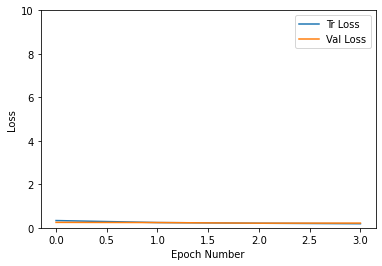

In [ ]:
import matplotlib.pyplot as plt
history = np.array(history)
plt.plot(history[:,0:2])
plt.legend(['Tr Loss', 'Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0,10)
plt.savefig('loss_curve.png')
plt.show()

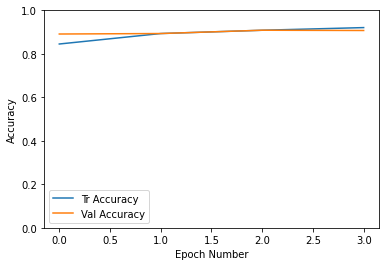

In [ ]:
plt.plot(history[:,2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.savefig('accuracy_curve.png')
plt.show()

In [ ]:
print(optimizer.state_dict())

f = open( 'test_optimizer_state_dict.txt', 'w' )
f.write( 'test_optimizer_state_dict = ' + repr(optimizer.state_dict()) + '\n' )
f.close()

{'state': {}, 'param_groups': [{'lr': 0.0001, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'initial_lr': 0.0001, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]}]}


In [ ]:
#print(model.state_dict())

f = open( 'test_model_state_dict.txt', 'w' )
f.write( 'test_model_state_dict = ' + repr(model.state_dict()) + '\n' )
f.close()

In [ ]:
dict = {'one': 1, 'two': 2}
f = open( 'test123.txt', 'w' )
f.write( 'dict = ' + repr(dict) + '\n' )
f.close()

In [ ]:
print(history[:,3:4])
flat_list = [item for sublist in history[:,3:4] for item in sublist]

[[0.89121324]
 [0.8934375 ]
 [0.90863971]
 [0.90738971]]


In [ ]:
best_acc=max(flat_list)
print(best_acc)

0.908639705882353


In [ ]:
#trial1 = torch.load('epoch_60.pt')
#print(trial1)
#print(model)
import shutil
def save_checkpoint123(state123, is_best123, filename123='checkpoint.pth.tar'):
    torch.save(state123, filename123)
    if is_best123:
        shutil.copyfile(filename123, 'model_best.pth.tar')
        
save_checkpoint123({
            'epoch': epoch + 1,
            'arch': 'resnet18',
            'state_dict': model.state_dict(),
            'best_prec1': best_acc,
            'optimizer' : optimizer.state_dict(),
            'all_history': history,
            'exp_lr_scheduler_dict' : exp_lr_scheduler.state_dict(),
        }, True)

NameError: ignored

In [ ]:
resume = 'model_best.pth.tar'
if resume:
        if os.path.isfile(resume):
            print("=> loading checkpoint '{}'".format(resume))
            checkpoint = torch.load(resume)
            start_epoch = checkpoint['epoch']
            best_prec1 = checkpoint['best_prec1']
            model.load_state_dict(checkpoint['state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer'])
            all_history = (checkpoint['all_history']).tolist()
            exp_lr_scheduler = checkpoint['exp_lr_scheduler_dict']
            print("=> loaded checkpoint '{}' (epoch {})"
                  .format(resume, checkpoint['epoch']))
        else:
            print("=> no checkpoint found at '{}'".format(args.resume))

=> loading checkpoint 'model_best.pth.tar'
=> loaded checkpoint 'model_best.pth.tar' (epoch 46)


In [ ]:
print(start_epoch)
print(all_history)
history = all_history

46
[[0.3336378428488637, 0.24925454320276486, 0.8452790926750791, 0.8912132354343638], [0.2412737973494842, 0.24138978296781288, 0.893433876740604, 0.8934375002103694], [0.21039554925270695, 0.21234402717912898, 0.9085469631143941, 0.908639705882353], [0.1866289673821081, 0.2162141184158185, 0.9207448011357129, 0.9073897060225992]]


In [ ]:
EPOCHS = 8
SAVE_DIR = 'models'
MODEL_SAVE_PATH = os.path.join(SAVE_DIR, 'EpochIncrRaceClahe-ResentFT-males-vs-females.pt')

best_valid_loss = float('inf')

if not os.path.isdir(f'{SAVE_DIR}'):
    os.makedirs(f'{SAVE_DIR}')
history = []
for epoch in range(EPOCHS):
    epoch_start = time.time()
    train_loss, train_acc = train(model, device, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, device, valid_iterator, criterion)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), MODEL_SAVE_PATH)

    history.append([train_loss, valid_loss, train_acc, valid_acc])
    epoch_end = time.time()
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:05.2f}% | Val. Loss: {valid_loss:.3f} | Val. Acc: {valid_acc*100:05.2f}% | Time: {epoch_end-epoch_start:.4f}s |')

| Epoch: 01 | Train Loss: 0.026 | Train Acc: 99.04% | Val. Loss: 0.375 | Val. Acc: 91.29% | Time: 638.5174s |
| Epoch: 02 | Train Loss: 0.025 | Train Acc: 99.08% | Val. Loss: 0.385 | Val. Acc: 91.39% | Time: 641.6473s |
| Epoch: 03 | Train Loss: 0.025 | Train Acc: 99.11% | Val. Loss: 0.383 | Val. Acc: 91.42% | Time: 642.9855s |
| Epoch: 04 | Train Loss: 0.023 | Train Acc: 99.18% | Val. Loss: 0.373 | Val. Acc: 91.54% | Time: 650.2541s |
| Epoch: 05 | Train Loss: 0.023 | Train Acc: 99.22% | Val. Loss: 0.366 | Val. Acc: 91.53% | Time: 649.6102s |
| Epoch: 06 | Train Loss: 0.023 | Train Acc: 99.18% | Val. Loss: 0.384 | Val. Acc: 91.11% | Time: 645.5047s |
| Epoch: 07 | Train Loss: 0.021 | Train Acc: 99.27% | Val. Loss: 0.411 | Val. Acc: 90.78% | Time: 643.3018s |
| Epoch: 08 | Train Loss: 0.023 | Train Acc: 99.19% | Val. Loss: 0.404 | Val. Acc: 91.34% | Time: 643.0496s |
| Epoch: 09 | Train Loss: 0.020 | Train Acc: 99.32% | Val. Loss: 0.409 | Val. Acc: 91.58% | Time: 635.4235s |
| Epoch: 1

In [ ]:
EPOCHS = 4
SAVE_DIR = 'models'
MODEL_SAVE_PATH = os.path.join(SAVE_DIR, 'EpochIncrRaceClahe-ResentFT-males-vs-females.pt')

best_valid_loss = float('inf')

if not os.path.isdir(f'{SAVE_DIR}'):
    os.makedirs(f'{SAVE_DIR}')
history = []
for epoch in range(start_epoch,start_epoch+EPOCHS):
    epoch_start = time.time()
    train_loss, train_acc = train(model, device, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, device, valid_iterator, criterion)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), MODEL_SAVE_PATH)
    
    history.append([train_loss, valid_loss, train_acc, valid_acc])
    epoch_end = time.time()
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:05.2f}% | Val. Loss: {valid_loss:.3f} | Val. Acc: {valid_acc*100:05.2f}% | Time: {epoch_end-epoch_start:.4f}s |')
    

| Epoch: 39 | Train Loss: 0.334 | Train Acc: 84.53% | Val. Loss: 0.249 | Val. Acc: 89.12% | Time: 480.6085s |
| Epoch: 40 | Train Loss: 0.241 | Train Acc: 89.34% | Val. Loss: 0.241 | Val. Acc: 89.34% | Time: 480.5910s |
| Epoch: 41 | Train Loss: 0.210 | Train Acc: 90.85% | Val. Loss: 0.212 | Val. Acc: 90.86% | Time: 485.6768s |
| Epoch: 42 | Train Loss: 0.187 | Train Acc: 92.07% | Val. Loss: 0.216 | Val. Acc: 90.74% | Time: 500.6241s |


In [ ]:
EPOCHS = 4
SAVE_DIR = 'models'
MODEL_SAVE_PATH = os.path.join(SAVE_DIR, 'EpochIncrRaceClahe-ResentFT-males-vs-females.pt')

best_valid_loss = float('inf')

if not os.path.isdir(f'{SAVE_DIR}'):
    os.makedirs(f'{SAVE_DIR}')
history = []
for epoch in range(start_epoch,start_epoch+EPOCHS):
    epoch_start = time.time()
    train_loss, train_acc = train(model, device, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, device, valid_iterator, criterion)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), MODEL_SAVE_PATH)
    
    history.append([train_loss, valid_loss, train_acc, valid_acc])
    epoch_end = time.time()
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:05.2f}% | Val. Loss: {valid_loss:.3f} | Val. Acc: {valid_acc*100:05.2f}% | Time: {epoch_end-epoch_start:.4f}s |')
    

| Epoch: 43 | Train Loss: 0.334 | Train Acc: 84.53% | Val. Loss: 0.249 | Val. Acc: 89.12% | Time: 488.3973s |
| Epoch: 44 | Train Loss: 0.241 | Train Acc: 89.34% | Val. Loss: 0.241 | Val. Acc: 89.34% | Time: 483.4105s |
| Epoch: 45 | Train Loss: 0.210 | Train Acc: 90.85% | Val. Loss: 0.212 | Val. Acc: 90.86% | Time: 482.4666s |
| Epoch: 46 | Train Loss: 0.187 | Train Acc: 92.07% | Val. Loss: 0.216 | Val. Acc: 90.74% | Time: 482.3090s |


In [ ]:
model.load_state_dict(torch.load('models/Resnet50_face_recognition_v1.pt'))
test_data = datasets.ImageFolder(dataset+'\\validation', test_transforms)
class_names = test_data.classes

dataloaders = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE)
nb_classes = 460


confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

print(confusion_matrix)

In [ ]:
print(confusion_matrix)
print(confusion_matrix.diag()/confusion_matrix.sum(1))
Ind_acc = confusion_matrix.diag()/confusion_matrix.sum(1)
print("Female : ", float(Ind_acc[0]))s
print("Male : ", float(Ind_acc[1]))
TN = int(confusion_matrix[0][0])
FN = int(confusion_matrix[0][1])
FP = int(confusion_matrix[1][0])
TP = int(confusion_matrix[1][1])

In [ ]:
FPR = 0
FNR = 0
TPR = 0
TNR = 0
FPR = FP/(FP + TN)
FNR = FN/(FN + TP)
TPR = 1 - FNR
TNR = 1 - FPR
Overall_acc = (TPR + TNR)/2
print("Overall Accuracy : ", Overall_acc)
print("Female : ", float(Ind_acc[0]))
print("Male : ", float(Ind_acc[1]))
print("FPR : ", FNR)
print("FNR : ", FPR)

In [ ]:
    model.eval()
    num_correct = 0 
    num_examples = 0
    for batch in val_loader:
        inputs, targets = batch
        inputs = inputs.to(device)
        output = model(inputs)
        targets = targets.to(device)
        loss = loss_fn(output,targets) 
        valid_loss += loss.data.item() * inputs.size(0)
        correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets)
        num_correct += torch.sum(correct).item()
        num_examples += correct.shape[0]
    valid_loss /= len(val_loader.dataset)
 
    print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}, accuracy = {:.2f}'.format(epoch, training_loss,
    valid_loss, num_correct / num_examples))

In [ ]:
summary(model)

end of epoch increment.

In [ ]:
data_transforms = {
    'test': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'dataset'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['test', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['6-10', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['6-10', 'val']}
class_names = image_datasets['val'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

FileNotFoundError: ignored

In [ ]:
model.load_state_dict(torch.load('models/clahe-ResentFT-males-vs-females.pt'))
test_data = datasets.ImageFolder('fairfaceclahe/Validation', test_transforms)
class_names = test_data.classes

dataloaders = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE)
nb_classes = 2


confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

print(confusion_matrix)

NameError: ignored

In [ ]:
print(confusion_matrix.diag()/confusion_matrix.sum(1))

tensor([0.2727, 1.0000])


In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [ ]:
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion() 

def visualize_model(model, num_images=22):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
           # print('GroundTruth: ', ' '.join('%5s' % class_names[labels[j]] for j in range(22)))

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                print('GroudthTruth: ',class_names[labels[j]])
                ax.set_title('Predicted: {}'.format(class_names[preds[j]]))
               
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

GroudthTruth:  female


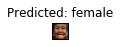

GroudthTruth:  female


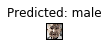

GroudthTruth:  female


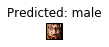

GroudthTruth:  female


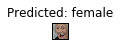

GroudthTruth:  female


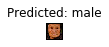

GroudthTruth:  female


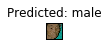

GroudthTruth:  female


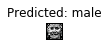

GroudthTruth:  female


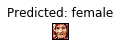

GroudthTruth:  female


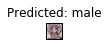

GroudthTruth:  female


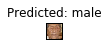

GroudthTruth:  female


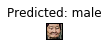

GroudthTruth:  male


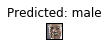

GroudthTruth:  male


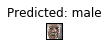

GroudthTruth:  male


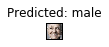

GroudthTruth:  male


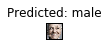

GroudthTruth:  male


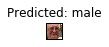

GroudthTruth:  male


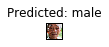

GroudthTruth:  male


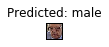

GroudthTruth:  male


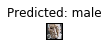

GroudthTruth:  male


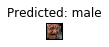

GroudthTruth:  male


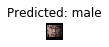

GroudthTruth:  male


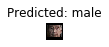

In [ ]:
out = torchvision.utils.make_grid(inputs)

visualize_model(model)
plt.ioff()
plt.show()